## Cargar datos

In [1]:
# Librerías 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('COLL_TEC_CONSOLIDADO.txt', sep=',', encoding='latin1')

C:\Users\52452\AppData\Local\Temp\ipykernel_13984\269966948.py:1: DtypeWarning: Columns (45,46,47,51,52,53,57,58,59,87,88,89,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('COLL_TEC_CONSOLIDADO.txt', sep=',', encoding='latin1')


<Axes: >

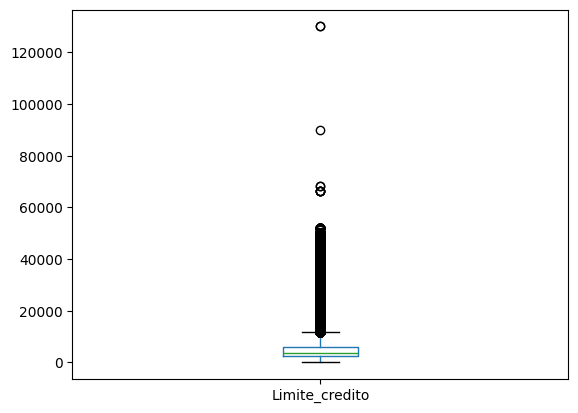

In [3]:
data.boxplot(column =['Limite_credito'], grid = False)

In [4]:
prom_credit = data["Limite_credito"].mean()
prom_credit

np.float64(5247.896788153325)

In [5]:
max_credit = data["Limite_credito"].max()
max_credit

np.float64(130000.0)

In [6]:
min_credit = data["Limite_credito"].min()
min_credit

np.float64(0.0)

In [7]:
mod_credit = data["Limite_credito"].mode()
mod_credit = 2300

In [8]:
median_credit = data["Limite_credito"].median()
median_credit

np.float64(3600.0)

In [42]:
percentil_15 = data['Limite_credito'].quantile(0.05)
percentil_15

np.float64(1100.0)

In [64]:
percentil_75 = data['Limite_credito'].quantile(0.75)
percentil_75

np.float64(6040.0)

In [53]:
percentil_90 = data['Limite_credito'].quantile(0.90)
percentil_90

np.float64(10440.0)

In [55]:
bins = [min_credit, percentil_15, mod_credit, median_credit, percentil_75, percentil_90, max_credit]
labels = ["Muy bajo", "Bajo", "Moderado", "Medio Alto", "Alto", "Muy  alto"]

In [56]:
data['Grupo_Credito'] = pd.cut(data['Limite_credito'], bins=bins, labels=labels, include_lowest=True)

In [57]:
data_groupes = data[["Grupo_Credito", "Limite_credito", "Socio", "ORG", "Producto"]]
data_groupes

,Grupo_Credito,Limite_credito,Socio,ORG,Producto
0,Alto,8800.0,CYA,310,PLCC
1,Medio Alto,5990.0,CYA,310,PLCC
2,Medio Alto,5000.0,CYA,310,PLCC
3,Alto,8800.0,CYA,310,PLCC
4,Moderado,2590.0,CYA,310,PLCC
...,...,...,...,...,...
1289876,Moderado,2600.0,PRO,377,PLCC
1289877,Moderado,2400.0,PRO,377,PLCC
1289878,Bajo,2000.0,PRO,377,PLCC
1289879,Moderado,2600.0,PRO,377,PLCC


In [58]:
# 1. Agrupar por 'Grupo_Credito' y contar socios, ORG y productos
resultados_socios = data.groupby('Grupo_Credito')['Socio'].value_counts().unstack(fill_value=0)
resultados_org = data.groupby('Grupo_Credito')['ORG'].value_counts().unstack(fill_value=0)
resultados_productos = data.groupby('Grupo_Credito')['Producto'].value_counts().unstack(fill_value=0)

C:\Users\52452\AppData\Local\Temp\ipykernel_13984\521694482.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados_socios = data.groupby('Grupo_Credito')['Socio'].value_counts().unstack(fill_value=0)
C:\Users\52452\AppData\Local\Temp\ipykernel_13984\521694482.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados_org = data.groupby('Grupo_Credito')['ORG'].value_counts().unstack(fill_value=0)
C:\Users\52452\AppData\Local\Temp\ipykernel_13984\521694482.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

In [59]:
resultados_org

ORG,310,311,320,340,341,350,352,353,354,355,...,360,362,365,367,372,373,374,375,377,378
Grupo_Credito,,,,,,,,,,,,,,,,,,,,,
Muy bajo,1890,21599,9837,25,23,22,23109,572,13017,1783,...,5,11,0,0,4315,357,3976,657,932,18
Bajo,2658,70038,7871,336,7194,40,165573,591,68195,2494,...,376,418,79,128,12082,702,10279,1289,3882,373
Moderado,2060,65676,17161,138,9898,26,53088,604,29674,5553,...,2331,3349,413,752,426,631,592,1209,3612,350
Medio Alto,4003,72127,72666,318,45698,259,64768,1345,36502,25144,...,9721,13524,1302,2708,57,1354,85,467,1673,677
Alto,5560,12356,27928,337,15761,27,26598,1110,15883,6730,...,1713,1762,454,1084,0,1391,0,213,1,0
Muy alto,4,0,46310,244,3621,69,26805,7449,18496,8646,...,930,1045,44,373,1,25,0,170,0,0


In [60]:
resultados_socios

Socio,BOD,BRA,CCP,CYA,GCC,LOB,PRO,SHA,SUB
Grupo_Credito,,,,,,,,,
Muy bajo,27435,22,34,33374,16998,1,3111,2440,929
Bajo,178073,40,373,88097,78850,0,6843,3862,1293
Moderado,56863,26,354,94933,32597,4,10820,7175,1235
Medio Alto,78349,259,1072,194812,46308,7,37236,26913,2699
Alto,28360,27,46,61942,17596,8,9832,7397,2501
Muy alto,27851,69,47,50179,19426,0,14829,8860,7474


In [61]:
resultados_productos

Producto,BK,PLCC,PP
Grupo_Credito,,,
Muy bajo,50536,33744,64
Bajo,247597,101303,8531
Moderado,112570,74556,16881
Medio Alto,233941,80443,73271
Alto,87077,19521,21111
Muy alto,122278,200,6257


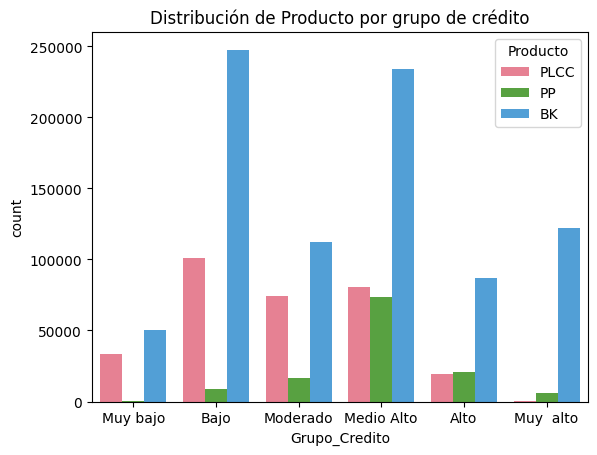

In [65]:
paleta = sns.color_palette("husl", 3)
sns.countplot(data=data, x='Grupo_Credito', hue='Producto', palette= paleta)
plt.title('Distribución de Producto por grupo de crédito')
plt.show()

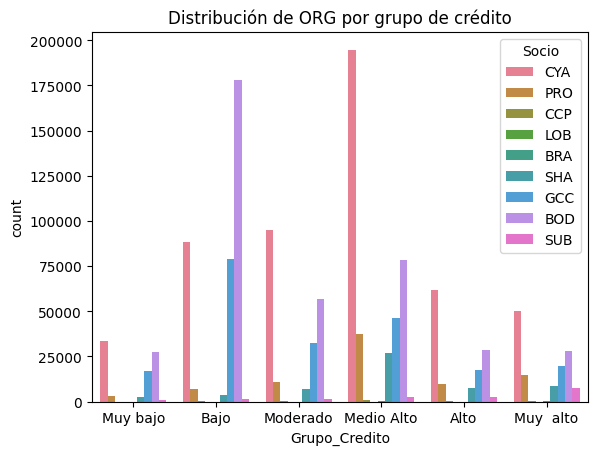

In [63]:
paleta = sns.color_palette("husl", 9)
sns.countplot(data=data, x='Grupo_Credito', hue='Socio', palette= paleta)
plt.title('Distribución de ORG por grupo de crédito')
plt.show()